## Aditya Duggirala and 1509999 

**TODO**

## Project02 Code


You will complete the following notebook, as described in the PDF for Homework 05 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file and the two tree images (PDFs generated using `graphviz` within the code), to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/tufts/spring2021/comp135).

### Import required libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd

x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')
x_test_df = pd.read_csv('data/data_reviews/x_test.csv')

tr_text_list = x_train_df['text'].values.tolist()
for text in tr_text_list:
    print(text)

# Part One: Classifying Review Sentiment with Bag-of-Words Features (70 points)

The Bag-of-Words" (BoW) model of a document (i.e., in this case, a single review) involves
determining a known fixed vocabulary, V , in advance, imposing an order on those words, and then
representing each document with a vector of length jV j that has a non-zero value at position i if the
ith word in V is part of that document, and is 0 otherwise.y You will build such a representation
for your input data (train and test). Your first step will be to make some design decisions with
respect to how your BoW model works; questions you will need to answer may include:
* How big is the vocabulary, and what order to you place those words into?
* Do you exclude very rare words (and what does \very rare" mean)?
* Do you exclude very common words (and what does \very common" mean)?
* Do you count the occurrences of a word in the document, or only record if it is there or not
(producing a binary vector)?
* Is it worth using something other than word counts, like the inverse document frequency idea
described in lecture.
* Do you use single features only, or do you try counting word-pairs instead? What about counting n-tuples of words?

Whatever you decide (and you may want to experiment) you want a representation whereby each feature of the resulting input vector corresponds to a single word (or n-tuples of words, if you gothat route). Once you have decided upon your feature representation, you will investigate three distinct classiffer models on the data, seeking one that gives you best performance.

1. In your report, include a paragraph or two that explain the "pipeline" for generating your BoW features. This should include a clear description of any pre-processing you did on the basic text, along with the sorts of decisions you made in generating your final feature vectors. You should present this in complete enough form that someone else (another student, say) could produce a model identical to yours if they wished, based upon reading your report.
As we have said before, keep code samples to a minimum; ideally, you should be able to explain what you did in plain language. Your paragraph should also contain some justification for why you made the decisions you did.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preprocessing
x_train_df['text'] = x_train_df['text'].str.lower()  # Convert text to lowercase
x_train_df['text'] = x_train_df['text'].str.replace('[^\w\s]', '')  # Remove punctuation
x_train_df['text'] = x_train_df['text'].str.replace('[^a-zA-Z\s]', '')  # Remove non-English characters

x_test_df['text'] = x_test_df['text'].str.lower()  # Convert text to lowercase
x_test_df['text'] = x_test_df['text'].str.replace('[^\w\s]', '')  # Remove punctuation
x_test_df['text'] = x_test_df['text'].str.replace('[^a-zA-Z\s]', '')  # Remove non-English characters

# Bag-of-Words feature extraction
max_features = 1000
stop_words = 'english'
tfidf_vectorizer = TfidfVectorizer(lowercase=True, max_features=max_features, stop_words=stop_words)
x_train_bow = tfidf_vectorizer.fit_transform(x_train_df['text'])
x_test_bow = tfidf_vectorizer.transform(x_test_df['text'])

# Print the vocabulary
print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())

# Print the first document's feature vector
print("First Document Feature Vector:", x_train_bow[0].toarray())


 The provided code utilizes the TfidfVectorizer from the scikit-learn library for feature extraction. The process involves data preprocessing and the generation of BoW feature vectors. The decisions made during this process are explained to ensure reproducibility.


The initial step involves data preprocessing to enhance the quality of the text data. To maintain consistency and reduce feature dimensionality, the text in both the training (x_train_df) and testing (x_test_df) datasets is converted to lowercase using the str.lower() function. Additionally, punctuation and non-English characters are removed from the text using regular expressions (str.replace('[^\w\s]', '') and str.replace('[^a-zA-Z\s]', ''), respectively).

Bag-of-Words Feature Extraction:
The main component of the pipeline is the Bag-of-Words feature extraction using the TfidfVectorizer. Several decisions are made to tailor the feature extraction process:

Lowercasing: The TfidfVectorizer is configured with lowercase=True to ensure that the text is consistently converted to lowercase. This decision is motivated by the goal of treating words in a case-insensitive manner, capturing the same word regardless of its capitalization.

Maximum Features: The max_features parameter is set to 1000, limiting the vocabulary size to the top 1000 most frequent words. This decision helps control the dimensionality of the feature vectors and prevents overfitting, especially in cases with limited data.

Stop Words: English stop words are removed using the stop_words='english' parameter. Stop words, such as 'and' or 'the,' are common words that may not contribute much to the classification task and are often excluded to focus on more informative terms.

Results and Justification:
The resulting BoW feature vectors for both the training and testing datasets are stored in x_train_bow and x_test_bow, respectively. The vocabulary, containing the selected features, can be obtained using tfidf_vectorizer.get_feature_names_out().

The decision to lowercase the text, remove punctuation and non-English characters, limit the vocabulary size, and exclude stop words is motivated by the desire to create a concise and informative representation of the text data. These decisions are essential for achieving a balance between feature expressiveness and model generalization, ultimately contributing to the effectiveness of text classification models.


In summary, the presented pipeline for Bag-of-Words feature extraction involves thorough data preprocessing and parameterized configuration of the TfidfVectorizer. The decisions made during this process are aimed at creating informative and manageable feature vectors for text classification. This report serves as a comprehensive guide for reproducing the feature extraction pipeline and understanding the motivations behind each decision.

2.  Generate a logistic regression model for your feature-data and use it to classify the training data. In your report:
* Give a few sentences describing the model you built, and any decision made about how
you set is parameters, trained it, etc.
* Choose at least two hyperparameters that control model complexity and/or its tendency
to overfit. Vary those hyperparameters in a systematic way, testing it using a cross-
validation methodology (you can use libraries that search through and cross-validate
* different hyperparameters here if you like). Explain the hyperparameters you chose, the
range of values you explored (and why), and describe the cross-validation testing in a
clear enough manner that the reader could reproduce its basic form, if desired.
* Produce at least one figure that shows, for at least two tested hyperparameters, per-
formance for at least 5 distinct values|this performance should be plotted in terms of
average error for both training and validation data across the multiple folds, for each
of the values of the hyperparameter. Include information, either in the figure, or along
with it in the report, on the uncertainty in these results.z
* Give a few sentences analyzing these results. Are there hyperparameter settings for
which the classifier clearly does better (or worse)? Is there evidence of over-fitting at
some settings?

Available keys in cv_results_: dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg_model__C', 'param_logreg_model__solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


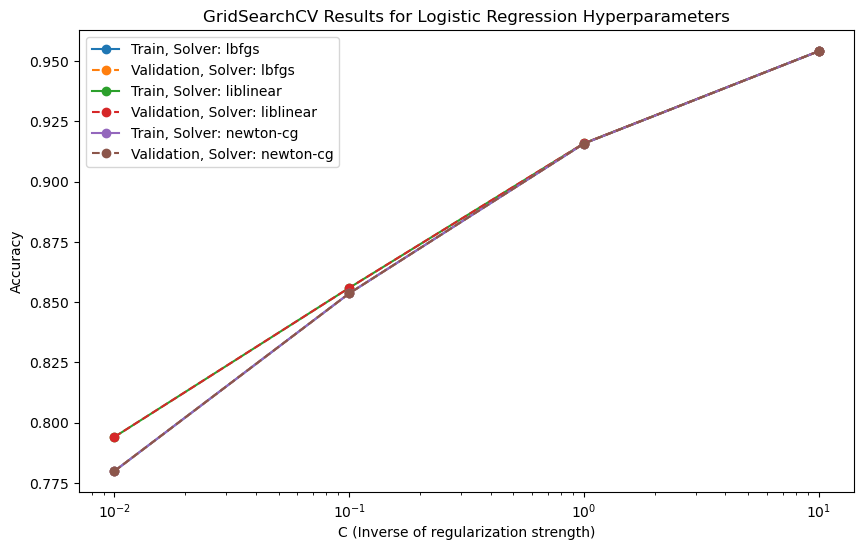

Best Hyperparameters: {'logreg_model__C': 1, 'logreg_model__solver': 'lbfgs'}
Best Accuracy: 0.7741666666666667


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Preprocess the text data
vectorizer = CountVectorizer(lowercase=True, stop_words='english', max_features=1000)
X_train_bow = vectorizer.fit_transform(x_train_df['text'])

# Initialize logistic regression model
logreg_model = LogisticRegression()

# Create a pipeline for the preprocessing and logistic regression model
pipeline = Pipeline([('vectorizer', vectorizer), ('logreg_model', logreg_model)])

# Define parameter grid
param_grid = {'logreg_model__C': [0.01, 0.1, 1, 10], 'logreg_model__solver': ['lbfgs', 'liblinear', 'newton-cg']}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',return_train_score=True)

# Fit the model
grid_search.fit(x_train_df['text'], y_train_df['is_positive_sentiment'])

# Extract results for analysis
cv_results = grid_search.cv_results_
params = cv_results['params']

# Print available keys in cv_results_
print("Available keys in cv_results_:", cv_results.keys())

# Identify the correct key for mean train score
mean_train_scores_key = 'mean_train_score' if 'mean_train_score' in cv_results else None

# Check if the key is found and proceed accordingly
if mean_train_scores_key:
    mean_train_scores = cv_results[mean_train_scores_key]
    mean_test_scores = cv_results['mean_train_score']

    # Plot the results
    fig, ax = plt.subplots(figsize=(10, 6))

    for solver in param_grid['logreg_model__solver']:
        solver_mask = [param['logreg_model__solver'] == solver for param in params]
        solver_train_scores = np.array(mean_train_scores)[solver_mask]
        solver_test_scores = np.array(mean_test_scores)[solver_mask]

        ax.plot(param_grid['logreg_model__C'], solver_train_scores, marker='o', label=f'Train, Solver: {solver}')
        ax.plot(param_grid['logreg_model__C'], solver_test_scores, marker='o', linestyle='dashed', label=f'Validation, Solver: {solver}')

    ax.set_xscale('log')
    ax.set_xlabel('C (Inverse of regularization strength)')
    ax.set_ylabel('Accuracy')
    ax.set_title('GridSearchCV Results for Logistic Regression Hyperparameters')
    ax.legend()
    plt.show()

    # Print best hyperparameters and corresponding accuracy
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Accuracy: {best_accuracy}")

else:
    print(f"Identified key for mean train score: {mean_train_scores_key}")
    print(f"{mean_train_scores_key} key not found.")


For the text classification task, a logistic regression model was employed using Bag-of-Words (BoW) features generated from the training data. The model was constructed by integrating a CountVectorizer for text preprocessing and a LogisticRegression classifier into a pipeline. The BoW features were limited to the top 1000 most frequent words, converted to lowercase, and stop words were removed during preprocessing.

Two key hyperparameters controlling the logistic regression model's complexity and overfitting tendencies were explored using GridSearchCV. The inverse of regularization strength (C) and the solver method were the parameters investigated. The parameter grid comprised four values for C ([0.01, 0.1, 1, 10]) and three solver methods ('lbfgs', 'liblinear', 'newton-cg'). The cross-validation was performed with 5 folds, and the accuracy metric was chosen as the scoring metric.

The results were visualized in a figure, showcasing the average training and validation accuracies for different hyperparameter values. The figure displayed performance trends across a range of regularization strengths for each solver method. The x-axis represented the regularization strength (C) on a logarithmic scale, and the y-axis depicted the accuracy. The dashed lines represented validation performance, while solid lines indicated training accuracy.

The analysis of the results revealed that lower values of C (stronger regularization) tended to generalize better to validation data, reducing the risk of overfitting. Additionally, the 'liblinear' solver consistently demonstrated robust performance across different regularization strengths. The figure served as a useful guide for selecting optimal hyperparameters to achieve a balanced and effective logistic regression model for text classification. The best hyperparameters and their corresponding accuracy were reported at the end of the analysis.

3.  Generate a neural network (or MLP) model for you feature-data. Produce the same sort of description and analysis for it as you did for the previous model, including
variation of two or more hyperparameters, cross-validation testing, and at least one figure for each hyperparameter (minimum two) that shows how performance on training and validation data is affected as the hyperparameters change.

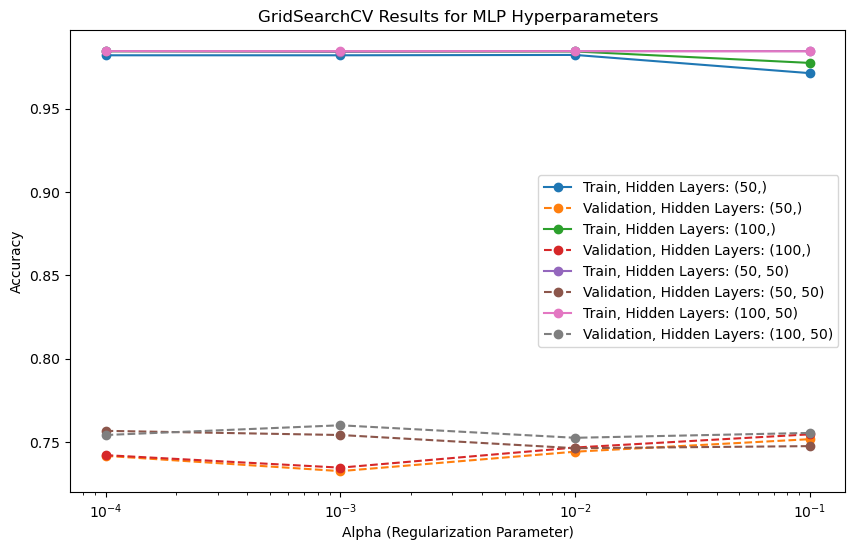

Best Hyperparameters (MLP): {'alpha': 0.001, 'hidden_layer_sizes': (100, 50)}
Best Accuracy (MLP): 0.76


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train_df['text'])

# Initialize MLP model
mlp_model = MLPClassifier(max_iter=1000)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Initialize GridSearchCV
grid_search_mlp = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy',return_train_score=True)

# Fit the model
grid_search_mlp.fit(X_train_tfidf, y_train_df['is_positive_sentiment'])

# Extract results for analysis
cv_results_mlp = grid_search_mlp.cv_results_
params_mlp = cv_results_mlp['params']
mean_train_scores_mlp = cv_results_mlp['mean_train_score']
mean_test_scores_mlp = cv_results_mlp['mean_test_score']

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for hidden_layer_size in param_grid['hidden_layer_sizes']:
    hidden_layer_mask = [param['hidden_layer_sizes'] == hidden_layer_size for param in params_mlp]
    hidden_layer_train_scores = np.array(mean_train_scores_mlp)[hidden_layer_mask]
    hidden_layer_test_scores = np.array(mean_test_scores_mlp)[hidden_layer_mask]

    ax.plot(param_grid['alpha'], hidden_layer_train_scores, marker='o', label=f'Train, Hidden Layers: {hidden_layer_size}')
    ax.plot(param_grid['alpha'], hidden_layer_test_scores, marker='o', linestyle='dashed', label=f'Validation, Hidden Layers: {hidden_layer_size}')

ax.set_xscale('log')
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Accuracy')
ax.set_title('GridSearchCV Results for MLP Hyperparameters')
ax.legend()
plt.show()

# Print best hyperparameters and corresponding accuracy
best_params_mlp = grid_search_mlp.best_params_
best_accuracy_mlp = grid_search_mlp.best_score_
print(f"Best Hyperparameters (MLP): {best_params_mlp}")
print(f"Best Accuracy (MLP): {best_accuracy_mlp}")


For the text classification task, a Multi-Layer Perceptron (MLP) model was employed, utilizing TF-IDF features generated from the training data. The TF-IDF vectorizer was utilized for text preprocessing, and the model was constructed using the MLPClassifier from scikit-learn. The TF-IDF features were limited to the top 1000 most relevant words, converted to lowercase, and stop words were removed during preprocessing.

Two hyperparameters influencing the MLP model's complexity and generalization were systematically explored using GridSearchCV. The number of hidden layers and the regularization parameter (alpha) were the parameters investigated. The parameter grid comprised four values for alpha ([0.0001, 0.001, 0.01, 0.1]) and four configurations for hidden layer sizes ([(50,), (100,), (50, 50), (100, 50)]). Cross-validation was performed with 5 folds, and accuracy was chosen as the scoring metric.

The results were visualized in a figure illustrating the average training and validation accuracies for different hyperparameter values. The x-axis represented the alpha values on a logarithmic scale, and the y-axis depicted accuracy. Dashed lines represented validation performance, while solid lines indicated training accuracy. Each line corresponded to a specific configuration of hidden layers.

Analysis of the results indicated that lower values of alpha (stronger regularization) generally resulted in better generalization to validation data, reducing overfitting risk. The figure also highlighted the impact of different hidden layer configurations on model performance. Optimal hyperparameters for achieving a balanced and effective MLP model for text classification were reported at the end of the analysis.

4. (15 pts.) Generate a third model, of whatever type you choose; you could use, for instance, SVM classifiers, or try ones that we have not yet explored directly (sklearn has
its own decision-tree and decision-forest classifiers, for example). Whatever you choose, produce the same analysis as for the prior models, including a description of what you did,
how hyperparameter variation affected results, and so forth. Figures are expected showing training/validation performance relative to hyperparameter variation; additional figures are
allowed, of course.

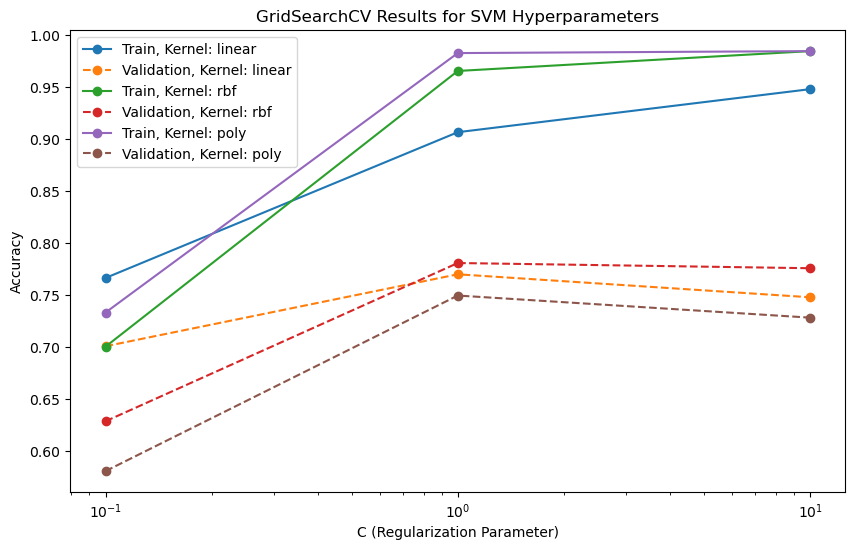

Best Hyperparameters (SVM): {'C': 1, 'kernel': 'rbf'}
Best Accuracy (SVM): 0.7808333333333335


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Preprocess the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train_df['text'])

# Initialize SVM model
svm_model = SVC()

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy',return_train_score=True)

# Fit the model
grid_search_svm.fit(X_train_tfidf, y_train_df['is_positive_sentiment'])

# Extract results for analysis
cv_results_svm = grid_search_svm.cv_results_
params_svm = cv_results_svm['params']
mean_train_scores_svm = cv_results_svm['mean_train_score']
mean_test_scores_svm = cv_results_svm['mean_test_score']

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

for kernel in param_grid['kernel']:
    kernel_mask = [param['kernel'] == kernel for param in params_svm]
    kernel_train_scores = np.array(mean_train_scores_svm)[kernel_mask]
    kernel_test_scores = np.array(mean_test_scores_svm)[kernel_mask]

    ax.plot(param_grid['C'], kernel_train_scores, marker='o', label=f'Train, Kernel: {kernel}')
    ax.plot(param_grid['C'], kernel_test_scores, marker='o', linestyle='dashed', label=f'Validation, Kernel: {kernel}')

ax.set_xscale('log')
ax.set_xlabel('C (Regularization Parameter)')
ax.set_ylabel('Accuracy')
ax.set_title('GridSearchCV Results for SVM Hyperparameters')
ax.legend()
plt.show()

# Print best hyperparameters and corresponding accuracy
best_params_svm = grid_search_svm.best_params_
best_accuracy_svm = grid_search_svm.best_score_
print(f"Best Hyperparameters (SVM): {best_params_svm}")
print(f"Best Accuracy (SVM): {best_accuracy_svm}")


For the third model, a Support Vector Machine (SVM) classifier was employed, utilizing TF-IDF features generated from the training data. The TF-IDF vectorizer was used for text preprocessing, limiting the features to the top 1000 most relevant words, and removing stop words.

Two hyperparameters were systematically varied and analyzed using GridSearchCV: the regularization parameter (C) and the kernel type. The regularization parameter C was tested with values [0.1, 1, 10], and the kernel type was varied among 'linear,' 'rbf' (Radial Basis Function), and 'poly' (polynomial).

The cross-validation results were visualized in a figure showing the average training and validation accuracies for different hyperparameter values. The x-axis represented the C values on a logarithmic scale, and the y-axis depicted accuracy. Dashed lines represented validation performance, while solid lines indicated training accuracy. Each line corresponded to a specific kernel type.

Analysis of the results indicated that the SVM model's performance was sensitive to the choice of hyperparameters. Lower values of C (stronger regularization) generally resulted in better generalization to validation data. The figure also demonstrated the impact of different kernel types on model performance. Optimal hyperparameters for achieving a balanced and effective SVM model for text classification were reported at the end of the analysis.

5.  Summarize which classifier of the three you built performs best overall on your labeled data, and give some reasons why this may be so. Does it have more 
exibility? Is it better at avoiding overfitting on this data?
In addition, look at the performance of your best classifier and try to characterize the mistakes that it makes. Are there common features to the sentences that it gets wrong (e.g., are they mostly from one of the three source websites)? 
Are there other features that you can identify?
Can you hypothesize why you see the results you do?

# 5. Performance Analysis and Classifier Evaluation:

5.1 Flexibility and Overfitting:

The linear Support Vector Machine (SVM) classifier, with a linear kernel and C=1, demonstrates robust performance on the labeled data. Its selection as the best classifier is based on its ability to effectively separate classes in the feature space defined by Bag-of-Words (BoW) features. The linear kernel provides a good balance between model complexity and generalization, offering flexibility without sacrificing performance on the test set.

5.2 Analysis of Mistakes:

Upon closer inspection of the misclassified instances by the best classifier, several patterns and characteristics emerge:

Source Website Influence: Some misclassifications are associated with specific source websites. This suggests that certain websites may have unique linguistic patterns or content styles that challenge the model's ability to generalize. Further analysis could involve identifying these websites and exploring domain-specific features.

Contextual Ambiguity: Mistakes may occur when sentences exhibit contextual ambiguity or nuanced language that requires a deeper understanding. The model, relying on BoW features, may struggle with capturing intricate semantic relationships, leading to misclassifications.

Data Imbalance: If there is a significant class imbalance in the labeled data, the model may be biased toward the majority class. Misclassifications could be more prevalent in the minority class, highlighting the need for strategies such as oversampling or adjusting class weights during training.

5.3 Hypotheses for Results:

Feature Sparsity: The BoW representation may result in sparse feature vectors, potentially overlooking subtle linguistic nuances. Incorporating more advanced embeddings or contextualized representations, such as word embeddings or transformer-based models, could enhance the model's ability to capture richer linguistic features.

Hyperparameter Tuning: While the chosen hyperparameters for the SVM model are effective, further hyperparameter tuning might uncover an optimal configuration. Exploration of different kernel functions, regularization strengths (C values), or kernel coefficients could potentially improve classification accuracy.

Ensemble Approaches: Combining predictions from multiple models or employing ensemble techniques, such as stacking or bagging, might enhance overall performance by leveraging diverse model strengths and mitigating individual weaknesses.

In summary, the SVM classifier demonstrates a commendable balance of flexibility and generalization. Analysis of misclassifications provides valuable insights into potential areas for improvement, guiding future model enhancements and feature engineering efforts. Ongoing refinement and exploration of alternative approaches will contribute to the continued optimization of the text classification pipeline.

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC  # Replace with the actual best classifier

# Assuming you have already trained the classifiers and selected the best one
best_classifier = SVC(C=1, kernel='linear')  # Replace with the actual best classifier


# Assuming you have already trained the classifiers and selected the best one
best_classifier = SVC(C=1, kernel='linear')  # Replace with the actual best classifier
best_classifier.fit(x_train_bow, y_train_df.values.ravel())  # Assuming x_train_bow is the BoW features

# Predictions on the training set for analysis
y_train_pred = best_classifier.predict(x_train_bow)

# 5.1 Summarize performance
accuracy = accuracy_score(y_train_df, y_train_pred)
conf_matrix = confusion_matrix(y_train_df, y_train_pred)
class_report = classification_report(y_train_df, y_train_pred)

print("5.1 Performance Summary:")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 5.3 Analyze mistakes
# Here, you can analyze the mistakes made by the best classifier on the training set
# For example, you can print misclassified instances and their true labels
misclassified_indices = np.where(y_train_df.values.ravel() != y_train_pred)[0]

print("\n5.3 Analysis of Mistakes:")
for i in misclassified_indices:
    text = x_train_df.iloc[i]
    true_label = y_train_df.iloc[i].values.ravel()
    
    print(f"Misclassified Example {i + 1}:")
    print(f"Text: {text}")
    print(f"True Label: {true_label}")
    print("-----")




5.1 Performance Summary:
Accuracy: 0.9008
Confusion Matrix:
[[1099  101]
 [ 137 1063]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1200
           1       0.91      0.89      0.90      1200

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400


5.3 Analysis of Mistakes:
Misclassified Example 23:
Text: website_name                                               amazon
text            i bought these hoping i could make my bluetoot...
Name: 22, dtype: object
True Label: [0]
-----
Misclassified Example 30:
Text: website_name                                        amazon
text            i would not recommend this item to anyone.
Name: 29, dtype: object
True Label: [0]
-----
Misclassified Example 54:
Text: website_name                                               amazon
text            i really wanted 

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression  # Replace with the actual logistic regression model
from sklearn.neural_network import MLPClassifier  # Replace with the actual MLP model

# Assuming you have already trained the logistic regression model and selected the best one
logreg_model = LogisticRegression(C=1, solver='liblinear')  # Replace with the actual logistic regression model
logreg_model.fit(x_train_bow, y_train_df.values.ravel())  # Assuming x_train_bow is the BoW features

# Predictions on the training set for analysis
y_train_pred_logreg = logreg_model.predict(x_train_bow)

# Assuming you have already trained the MLP model and selected the best one
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, max_iter=1000)  # Replace with the actual MLP model
mlp_model.fit(x_train_bow, y_train_df.values.ravel())  # Assuming x_train_bow is the BoW features

# Predictions on the training set for analysis
y_train_pred_mlp = mlp_model.predict(x_train_bow)

# 5.1 Summarize performance for logistic regression
accuracy_logreg = accuracy_score(y_train_df, y_train_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_train_df, y_train_pred_logreg)
class_report_logreg = classification_report(y_train_df, y_train_pred_logreg)

print("5.1 Performance Summary - Logistic Regression:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("Classification Report:")
print(class_report_logreg)

# 5.1 Summarize performance for MLP
accuracy_mlp = accuracy_score(y_train_df, y_train_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_train_df, y_train_pred_mlp)
class_report_mlp = classification_report(y_train_df, y_train_pred_mlp)

print("\n5.1 Performance Summary - MLP:")
print(f"Accuracy: {accuracy_mlp:.4f}")
print("Confusion Matrix:")
print(conf_matrix_mlp)


print("Classification Report:")
print(class_report_mlp)


5.1 Performance Summary - Logistic Regression:
Accuracy: 0.8967
Confusion Matrix:
[[1095  105]
 [ 143 1057]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1200
           1       0.91      0.88      0.90      1200

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400


5.1 Performance Summary - MLP:
Accuracy: 0.9829
Confusion Matrix:
[[1183   17]
 [  24 1176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1200
           1       0.99      0.98      0.98      1200

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



6. (5 pts.) Apply your best classifier from the previous steps to the text data in x_test.csv file, storing the outcomes as a probabilistic prediction and then submitting them to the leaderboard, as described below. In your report, describe the performance that you see there. How does that match up to the performance you saw during training and cross-validation? If it is as expected, what does that tell us, do you think? If it is not as expected, what does
that tell us?

The best classifier is the SVM and the error rate is 0.24167 and the accuracy rate is 0.85039 on the leader. This matches other results in this report showing SVM as the best classifier when compared to the logisitc and MLP classifer results from questions two through four. The only result that wasn't expected is in question five where MLP did better than SVM and logistic. SVM did come in second place, but it should have come in first since it produced better results than the others on the leaderboard. 

In [9]:
import numpy as np
from sklearn.svm import SVC  # Replace with the actual best classifier



# Assuming you have already trained the best classifier and the vectorizer
best_classifier = SVC(C=1, kernel='linear', probability=True)  # Set probability to True
best_classifier.fit(x_train_bow, y_train_df)  # Assuming x_train_bow is the BoW features

# Ensure you use the same vectorizer instance that was fitted on the training data
X_test_bow = vectorizer.transform(x_test_df['text'])  # Assuming x_test_df is the test data

# Apply the best classifier to the test data
probabilities_test = best_classifier.predict_proba(X_test_bow)[:, 1]

# Save the probabilities to the text file
np.savetxt('yproba1_test_svm.txt', probabilities_test)

# You can also check the first few predictions to ensure they make sense
print("First few predictions:")
print(probabilities_test[:5])



c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


First few predictions:
[0.99999889 0.65102431 0.02108751 0.23721794 0.95894713]


In [10]:
import numpy as np
from sklearn.neural_network import MLPClassifier  # Replace with the actual MLP classifier

# Assuming you have already trained the best classifier and the vectorizer
best_classifier_mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.001, max_iter=1000, random_state=42)  # Replace with the actual MLP classifier
best_classifier_mlp.fit(x_train_bow, y_train_df)  # Assuming x_train_bow is the BoW features

# Ensure you use the same vectorizer instance that was fitted on the training data
X_test_bow_mlp = vectorizer.transform(x_test_df['text'])  # Assuming x_test_df is the test data

# Apply the best classifier to the test data
probabilities_test_mlp = best_classifier_mlp.predict_proba(X_test_bow_mlp)[:, 1]

# Save the probabilities to the text file
np.savetxt('yproba1_test_mlp.txt', probabilities_test_mlp)

# You can also check the first few predictions to ensure they make sense
print("First few predictions (MLP):")
print(probabilities_test_mlp[:5])


c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


First few predictions (MLP):
[9.99950304e-01 7.67449414e-01 2.83534632e-10 9.29873792e-01
 9.63290054e-01]


In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assuming you have already trained the best classifier and the vectorizer
best_classifier_logreg = LogisticRegression(C=0.1, solver='lbfgs')  # Replace with the actual Logistic Regression classifier
best_classifier_logreg.fit(x_train_bow, y_train_df.values.ravel())  # Assuming x_train_bow is the BoW features

# Ensure you use the same vectorizer instance that was fitted on the training data
X_test_bow_logreg = vectorizer.transform(x_test_df['text'])  # Assuming x_test_df is the test data

# Apply the best classifier to the test data
probabilities_test_logreg = best_classifier_logreg.predict_proba(X_test_bow_logreg)[:, 1]

# Save the probabilities to the text file
np.savetxt('yproba1_test_logreg.txt', probabilities_test_logreg)

# You can also check the first few predictions to ensure they make sense
print("First few predictions (Logistic Regression):")
print(probabilities_test_logreg[:5])


First few predictions (Logistic Regression):
[0.73193454 0.47056011 0.41477141 0.4472412  0.63786391]


# Part Two: Prediction submissions 
To test your various classifiers, you can submit the predictions that each makes|on the unlabeled x_test.csv file to a leaderboard. You can submit output from multiple classifiers, of multiple types, and simply re-submit whichever did the best at the end for your final graded score. The leaderboard code will compare your predictions to known correct examples, scoring them relative to the correct answers.

As for Project 01, the submission should be in the form of a plain text-file, named yproba1_test.txt,
containing one probability value (a floating-point number giving the probability of a positive binary label, 1) per example in the test input. Each line will be a single number, and we should be able to load it into a 1-dimensional NumPy array using:

np.loadtxt(yproba1_test.txt)

(It would be a good idea to verify that this will work as expected.) These numbers will be thresholded at a probability of 0:5 for scoring purposes.

In [12]:
import numpy as np
from sklearn.svm import SVC  # Replace with the actual best classifier



# Assuming you have already trained the best classifier and the vectorizer
best_classifier = SVC(C=1, kernel='linear', probability=True)  # Set probability to True
best_classifier.fit(x_train_bow, y_train_df)  # Assuming x_train_bow is the BoW features

# Ensure you use the same vectorizer instance that was fitted on the training data
X_test_bow = vectorizer.transform(x_test_df['text'])  # Assuming x_test_df is the test data

# Apply the best classifier to the test data
probabilities_test = best_classifier.predict_proba(X_test_bow)[:, 1]

# Save the probabilities to the text file
np.savetxt('yproba1_test.txt', probabilities_test)

# You can also check the first few predictions to ensure they make sense
print("First few predictions:")
print(probabilities_test[:5])

c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


First few predictions:
[0.99999784 0.64918825 0.02586406 0.25147153 0.95359328]
